#  Estimate wine quality

## 1. Problem Statement

Task: Estimate the quality of wine

## 2. Data Set 

This dataset is taken from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality

Input data available:

* fixed acidity

* volatile acidity

* citric acid

* residual sugar

* chlorides

* free sulfur dioxide

* total sulfur dioxide

* density

* pH

* sulphates

* alcohol

* quality (score between 0 and 10) – dependent variable.

## 3. Solution

### Libraries 

In [66]:
# EDA libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to print the plt in screen 
%matplotlib inline

# data processing and evaluation 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# model libraries
from sklearn.ensemble import RandomForestClassifier

### Load Data 

In [4]:
wine_data = pd.read_csv('data/winequality-red.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
wines = wine_data.copy() # extra copy for safety 

### EDA and Visualization

In [20]:
# check the data is null or not 

wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


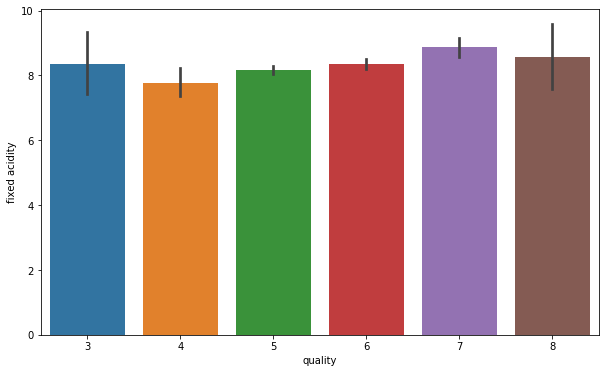

In [23]:
# plot quality with fixed acidity

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y= 'fixed acidity', data = wine_data);

In the above graph the fixed acidity doesnot specify any changes to the classification of quality 

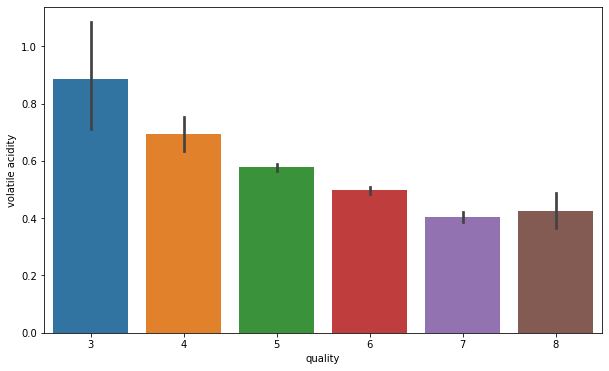

In [24]:
# plot quality with volatile acid
fig = plt.figure(figsize=(10,6))
sns.barplot(x = 'quality' , y= 'volatile acidity', data = wine_data);

In the above chart we can clearly see that volatile acidity decrease with increase in wine quality

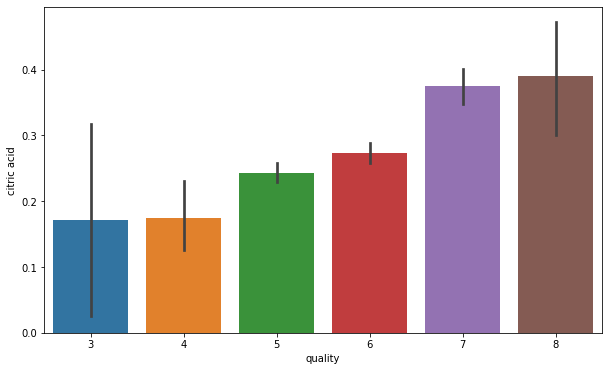

In [25]:
# plot qulaity with citric acid

fig = plt.figure(figsize=(10,6))
sns.barplot(x = 'quality', y='citric acid', data= wine_data);

From the above graph we can see that as the citric acid increases the quality of wine also increases

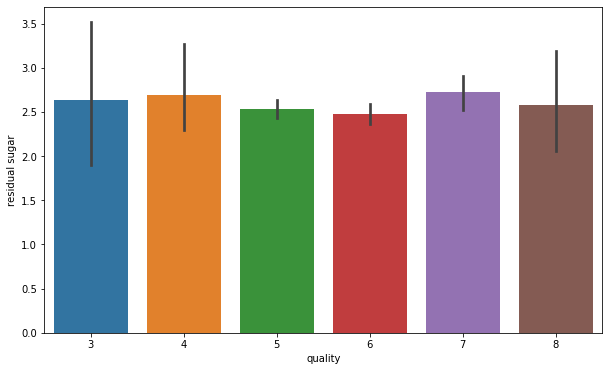

In [26]:
# plot the quality with residual sugar

fig = plt.figure(figsize=(10,6))
sns.barplot(x ='quality', y= 'residual sugar', data=wine_data);

From the above graph we can see that no changes happens in the quality due to residual sugar

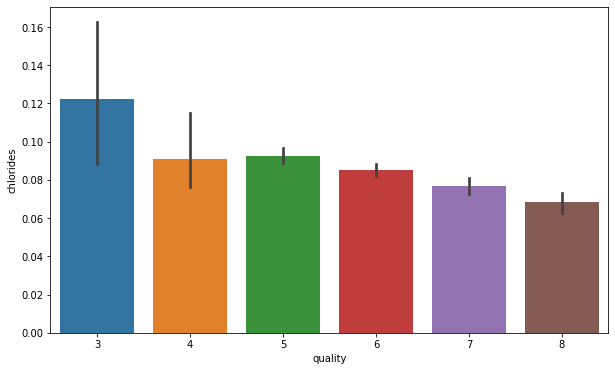

In [27]:
# plot the quality with chlorides 

fig = plt.figure(figsize=(10,6))
sns.barplot(x ='quality', y='chlorides', data = wine_data);

from the above we can see that the quality of increases as the chlorides decreases

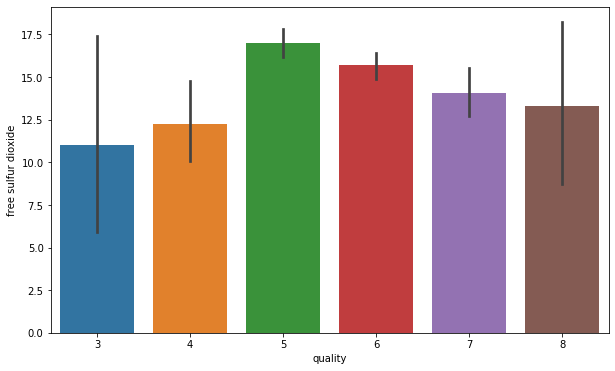

In [28]:
# plot the quality with free sulfur dioxide 

fig = plt.figure(figsize=(10,6))
sns.barplot(x= 'quality', y= 'free sulfur dioxide', data= wine_data);

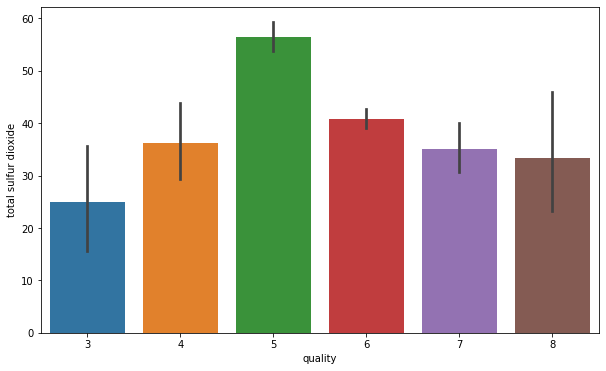

In [29]:
# plot the quality with total sulfur dioxide

fig = plt.figure(figsize=(10,6))
sns.barplot(x ='quality', y= 'total sulfur dioxide', data = wine_data);

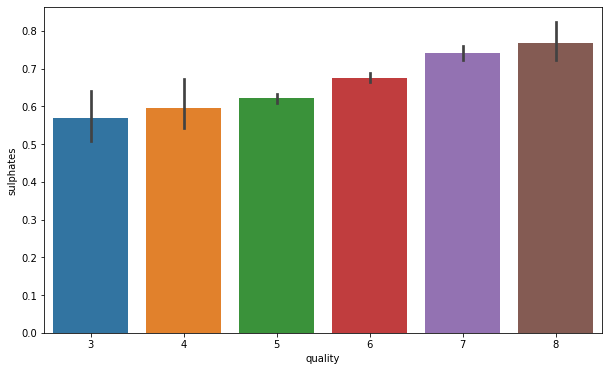

In [30]:
# plot the quality with sulphates

fig = plt.figure(figsize=(10,6))
sns.barplot(x = 'quality', y= 'sulphates', data = wine_data);

In the above graph we can see that the quality increses with sulphate

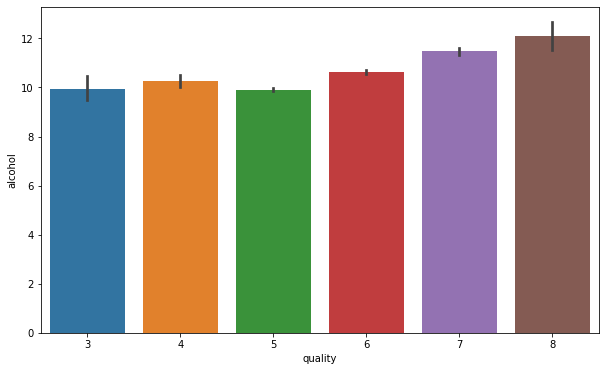

In [32]:
# plot quality with alcohol

fig = plt.figure(figsize=(10,6))
sns.barplot(x= 'quality', y='alcohol', data =wine_data);

In [33]:
# correlation of data

correlation = wine_data.corr()['quality'].drop('quality')
print (correlation)

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


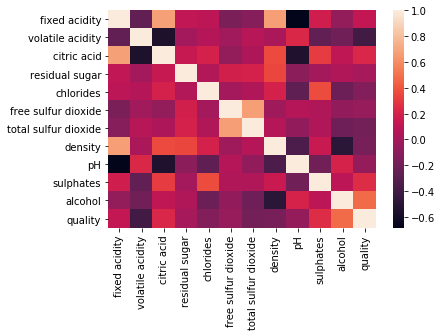

In [34]:
# heat map for correlation

sns.heatmap(wine_data.corr());

alcohol level also goes higher as te quality of wine increases


### Preprocessing Data for performing Machine learning algorithms

In [35]:
# check if data is null or not 

wine_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [36]:
# convert quality into binary class
bins = ( 2, 6.5, 8)
labels =['bad', 'good']
wine_data['quality'] = pd.cut(x = wine_data['quality'], bins = bins, labels= labels)

In [37]:
wine_data['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

In [39]:
labelencoder_y = LabelEncoder()
wine_data['quality'] = labelencoder_y.fit_transform(wine_data['quality'])

In [40]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


### Classification Using Random Forest 

In [54]:
# split data into X and y 

X = wine_data.drop('quality', axis = 1)
y = wine_data['quality']

In [55]:
# split data into training and testing set 

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size =0.2)                                                  

In [56]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [59]:
# create and fit model 
np.random.seed(42)

model = RandomForestClassifier()

model.fit(X_train_scaled,y_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [65]:
# Predicting Cross Validation Score
cv = cross_val_score(estimator = model, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv.mean())

y_pred_train = model.predict(X_train_scaled)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Training set: ", accuracy_train)

y_pred_test = model.predict(X_test_scaled)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test set: ", accuracy_test)

CV:  0.9069574311023623
Training set:  1.0
Test set:  0.909375


In [67]:
# Confusion matrix 
confusion_matrix(y_test, y_pred_test)

array([[271,  10],
       [ 19,  20]], dtype=int64)

In [68]:
# Assign TP,FP, TN,FN to variables
tp= confusion_matrix(y_test, y_pred_test)[0,0]
fp = confusion_matrix(y_test, y_pred_test)[0,1]
tn= confusion_matrix(y_test, y_pred_test)[1,1]
fn = confusion_matrix(y_test, y_pred_test)[1,0]

### Measuring The Error

In [69]:
models = [('Logistic Regression', tp, fp, tn, fn, accuracy_train, accuracy_test, cv.mean())]

predict = pd.DataFrame(data = models, columns=['Model', 'True Positive', 'False Positive', 'True Negative',
                                               'False Negative', 'Accuracy(training)', 'Accuracy(test)',
                                               'Cross-Validation'])
predict

,Model,True Positive,False Positive,True Negative,False Negative,Accuracy(training),Accuracy(test),Cross-Validation
0,Logistic Regression,271,10,20,19,1.0,0.909375,0.906957
